In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# 看下数据结构-head()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


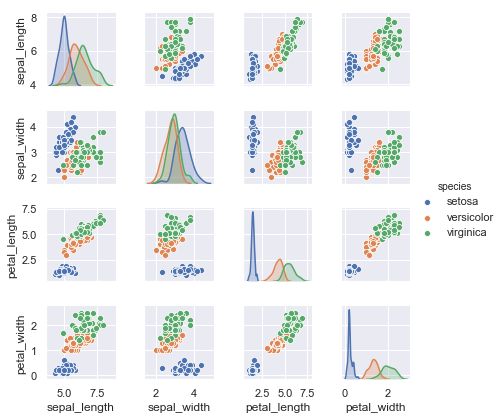

In [54]:
# paitplot
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

AttributeError: 'DataFrame' object has no attribute 'target'

In [12]:
iris.shape

(150, 5)

In [13]:
# x_iris是所有数字型数据
x_iris = iris.drop('species', axis=1)
x_iris.shape

(150, 4)

In [14]:
# y_iris是花种类数据（String型）
y_iris = iris['species']
y_iris.shape

(150,)

斜率是  [19.90625874]
截距是 0.4580520907666923


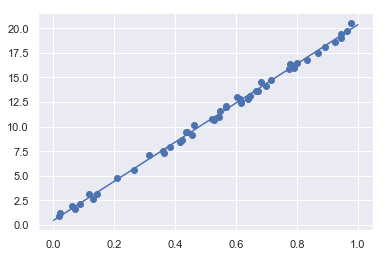

In [15]:
# 画出训练数据点
rng = np.random.RandomState(0)
x = rng.rand(50)
y = 20*x + rng.rand(50)
plt.scatter(x,y);

# 用这些点训练一个线性回归模型
from sklearn.linear_model import LinearRegression

myRegressionModel = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
myRegressionModel.fit(X, y)

# 线性回归截距和斜率
print("斜率是 ", myRegressionModel.coef_)
print("截距是", myRegressionModel.intercept_)

# 通过训练好的模型预测出函数并画出
xfit = np.linspace(0, 1)
Xfit = xfit[:, np.newaxis]
yfit = myRegressionModel.predict(Xfit)
plt.plot(Xfit, yfit);

In [16]:
# 提取训练数据
iris = sns.load_dataset('iris')
x_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# 用split方法训练一个贝叶斯模型
from sklearn.model_selection import train_test_split
X, x, Y, y = train_test_split(x_iris, y_iris, random_state = 1)
from sklearn.naive_bayes import GaussianNB
myBayesModel = GaussianNB()
myBayesModel.fit(X, Y)
predict = myBayesModel.predict(x)

# 测试该模型准确度
from sklearn.metrics import accuracy_score
accuracy_score(y, predict)

0.9736842105263158

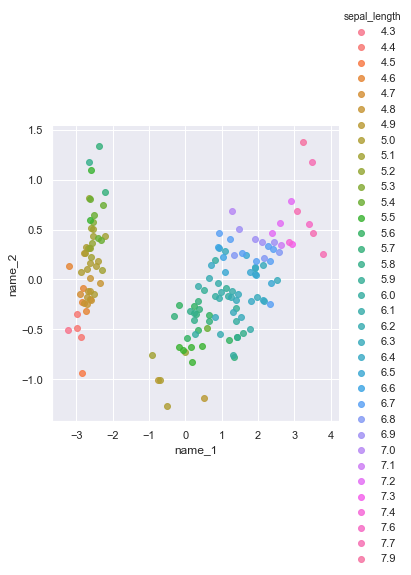

In [17]:
# PCA主成分分析法降维数据 - 数据预处理 - 只用到了x_iris
from sklearn.decomposition import PCA
myPCAModel = PCA(n_components = 2)
myPCAModel.fit(x_iris)
x_iris_2D = myPCAModel.transform(x_iris)

iris['name_1'] = x_iris_2D[:, 0]
iris['name_2'] = x_iris_2D[:, 1]
sns.lmplot('name_1', 'name_2', hue = 'sepal_length', data = iris, fit_reg=False);

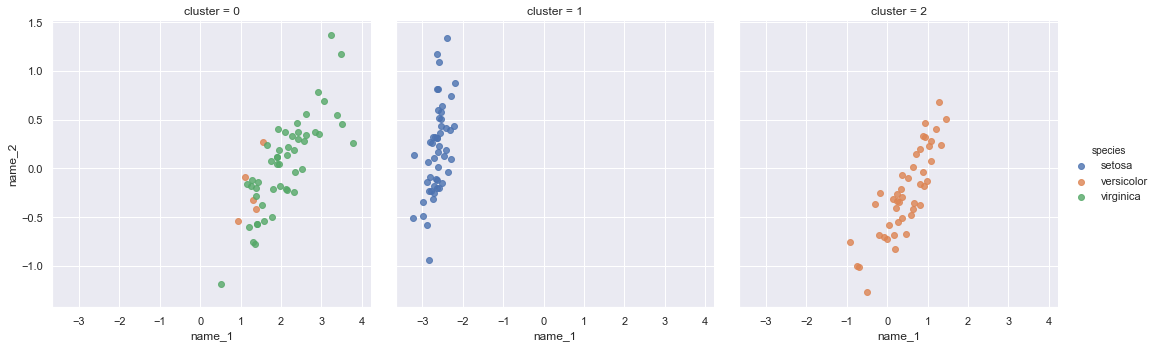

In [18]:
# 高斯混合模型 - 数据分堆
from sklearn.mixture import GaussianMixture
myMixtureModel = GaussianMixture(n_components=3, covariance_type='full')
myMixtureModel.fit(x_iris)
predict = myMixtureModel.predict(x_iris)

iris['cluster'] = predict
sns.lmplot("name_1", "name_2", data=iris, hue='species',col='cluster', fit_reg=False);

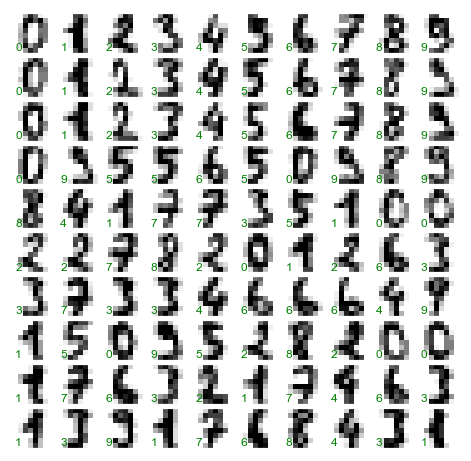

In [19]:
# 加载训练数据 - digits
from sklearn.datasets import load_digits
digits = load_digits()

# 通过循环布局subplot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, 
    color='green')

In [20]:
digits.images.shape

(1797, 8, 8)

In [21]:
digits.data.shape

(1797, 64)

In [22]:
digits.target.shape

(1797,)

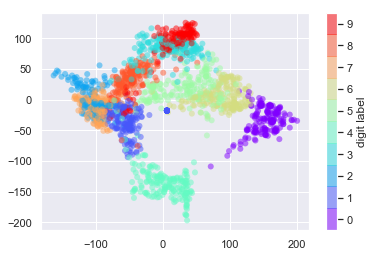

In [23]:
# 通过isomap进行降维 - 数据预处理
from sklearn.manifold import Isomap
myIsoModel = Isomap(n_components = 2)
myIsoModel.fit(digits.data)
digits_2D = myIsoModel.transform(digits.data)

plt.scatter(digits_2D[:, 0], digits_2D[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [24]:
# 用split方法训练一个贝叶斯模型
X, x, Y, y = train_test_split(digits.data, digits.target, random_state = 0)
from sklearn.naive_bayes import GaussianNB
myBayesModel = GaussianNB()
myBayesModel.fit(X, Y)
predict = myBayesModel.predict(x)

# 测试该模型准确度
from sklearn.metrics import accuracy_score
accuracy_score(y, predict)

0.8333333333333334

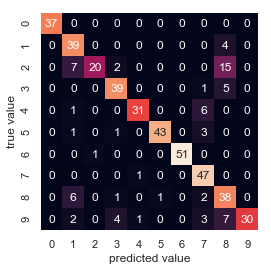

In [25]:
# 准确度的表格体现 - 如 predict value = 1， true value = 8 的地方显示6，说明有6次该模型把8认成了1
from sklearn.metrics import confusion_matrix
myMatrixModel = confusion_matrix(y, predict)
sns.heatmap(myMatrixModel, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

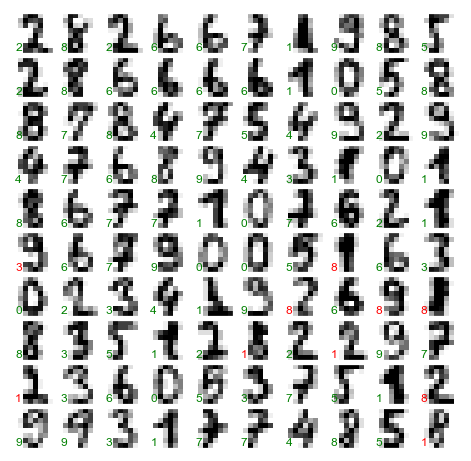

In [26]:
# 把贝叶斯模型结果显示出来
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = x.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(predict[i]),
    transform=ax.transAxes,
    color='green' if (y[i] == predict[i]) else 'red')

In [27]:
# import训练数据 - iris
from sklearn.datasets import load_iris
iris = load_iris()
x_iris = iris.data
y_iris = iris.target
# 训练一个knc模型
from sklearn.neighbors import KNeighborsClassifier
myKNCModel = KNeighborsClassifier(n_neighbors=1)
myKNCModel.fit(x_iris, y_iris)
predict = myKNCModel.predict(x_iris)
# 测试模型准确度
from sklearn.metrics import accuracy_score
accuracy_score(y_iris, predict)

1.0

In [28]:
# 用split方法训练一个knc模型
from sklearn.model_selection import train_test_split
X, x, Y, y = train_test_split(x_iris, y_iris, random_state=0, test_size=0.5)
myKNCModel.fit(X, Y)
predict = myKNCModel.predict(x)
# 测试该模型准确度
accuracy_score(y, predict)

0.9066666666666666

In [29]:
# train组和test组相互训练的不同结果
use_train_predict_test = myKNCModel.fit(X, Y).predict(x)
use_test_predict_train = myKNCModel.fit(x, y).predict(X)
accuracy_score(y, use_train_predict_test),accuracy_score(Y, use_test_predict_train)

(0.9066666666666666, 0.96)

In [30]:
# 交叉验证 - 用于选择最优模型
from sklearn.model_selection import cross_val_score
scores = cross_val_score(myKNCModel, x_iris, y_iris, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [31]:
scores.mean()

0.96

In [32]:
# 留一验证 - 即只留一个数据作为test，其他都用于train
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(myKNCModel, x_iris, y_iris, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
scores.mean()

0.96

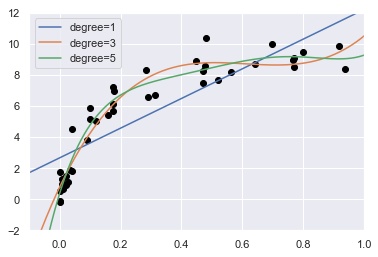

In [1]:
# 多项式回归方法
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
# 数据生成器
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    x_data = rng.rand(N, 1) ** 2
    y_data = 10 - 1. / (x_data.ravel() + 0.1)
    if err > 0:
        y_data += err * rng.randn(N)
    return x_data, y_data

# 生成数据
x_data, y_data = make_data(40)

# 分布数据
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set() 
data = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(x_data.ravel(), y_data, color='black') #ravel将多维数组降为一维
axis = plt.axis()

# 通过多项回归方法预测，并画图(画出三条线，分别是一次方，二次方，三次方)
for degree in [1, 3, 5]:
    predict = PolynomialRegression(degree).fit(x_data, y_data).predict(data)
    plt.plot(data.ravel(), predict, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

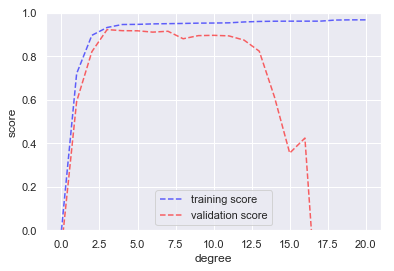

In [35]:
# 验证曲线 - 这图表明，随着degree的升高，PolynomialRegression()方法准确度降低
from sklearn.model_selection import validation_curve
degree = np.arange(21)
train_score, val_score = validation_curve(PolynomialRegression(), x_data, y_data,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.6, linestyle='dashed',label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.6, linestyle='dashed',label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

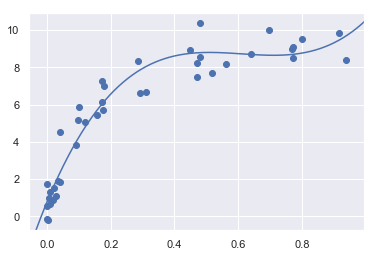

In [36]:
# 单独画出degree为3的曲线
plt.scatter(x_data.ravel(), y_data)
lim = plt.axis()
predict = PolynomialRegression(3).fit(x_data, y_data).predict(data)
plt.plot(data.ravel(), predict);
plt.axis(lim);

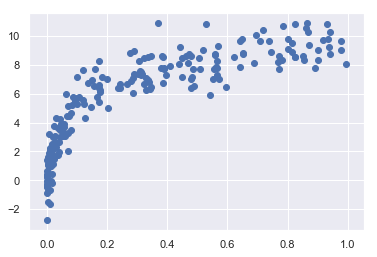

In [37]:
m_data, n_data = make_data(200)
plt.scatter(m_data.ravel(), n_data);

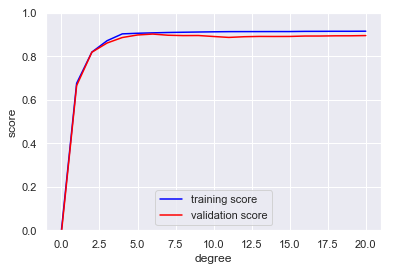

In [38]:
degree = np.arange(21)
train_score, val_score = validation_curve(PolynomialRegression(), m_data, n_data,
                                         'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score  , 1), color='red' , label='validation score')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

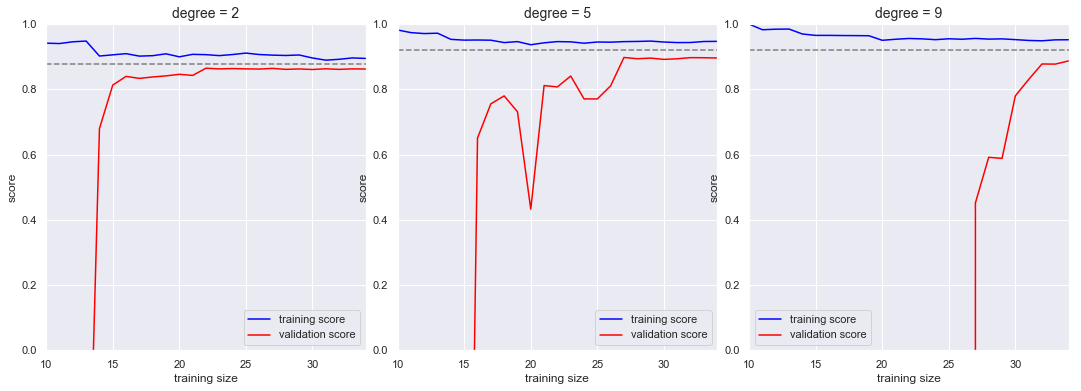

In [39]:
# 学习曲线
from sklearn.model_selection import learning_curve
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 5, 9]):
    N, train_learning_curve, val_learning_curve = learning_curve( PolynomialRegression(degree),
                                                                  x_data, y_data, cv=7,
                                                                  train_sizes=np.linspace(0.3, 1, 25) )
    #蓝色线 - 训练情况
    axes[i].plot(N, np.mean(train_learning_curve, 1), color='blue', label='training score')
    #红色线 - 验证情况
    axes[i].plot(N, np.mean(val_learning_curve, 1), color='red', label='validation score')
    #灰色线 - vlines(x, ymin, ymax) ； hlines(y, xmin, xmax)
    axes[i].hlines(np.mean([train_learning_curve[-1], val_learning_curve[-1]]), N[0], N[-1],color='gray', linestyle='dashed')
    #y轴范围、名字 
    axes[i].set_ylim(0, 1); axes[i].set_ylabel('score')
    #x轴范围、名字
    axes[i].set_xlim(N[0], N[-1]); axes[i].set_xlabel('training size')
    #图表抬头
    axes[i].set_title('degree = {0}'.format(degree), size=14)
    #legend
    axes[i].legend(loc='best')


In [40]:
# 用于调试参数的模型 - GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

myGridModel = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
myGridModel.fit(x_data, y_data)
myGridModel.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

ValueError: X shape does not match training shape

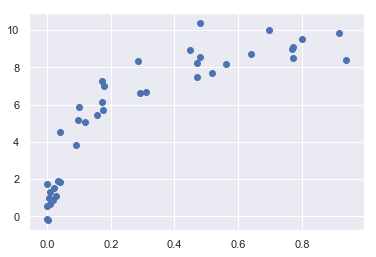

In [41]:
# 用参数已经调成最佳的模型预测
myBestGirdModel = myGridModel.best_estimator_

plt.scatter(x_data.ravel(), y_data)
lim = plt.axis()
predict = myBestGirdModel.fit(x_data, y_data).predict(x)
plt.plot(x.ravel(), predict)
plt.axis(lim);

In [42]:
data = [ {'price': 850000, 'rooms': 4,   'neighborhood': 'Queen Anne'},
         {'price': 700000, 'rooms': 3,      'neighborhood': 'Fremont'},
         {'price': 650000, 'rooms': 3,  'neighborhood': 'Wallingford'},
         {'price': 600000, 'rooms': 2,      'neighborhood': 'Fremont'}  ]

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [43]:
# 转换数据形式的一种模型 - DictVectorizer
from sklearn.feature_extraction import DictVectorizer
myDVModel = DictVectorizer(sparse=False, dtype=int)
myDVModel.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [44]:
# 转换为DictVectorizer后的列名
myDVModel.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [45]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [46]:
# 文本特征提取的一种模型 - CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
myCVModel = CountVectorizer()
fitted_date = myCVModel.fit_transform(sample)
# 至此 fitted_data 只能显示为稀疏矩阵
import pandas as pd
pd.DataFrame(fitted_date.toarray(), columns=myCVModel.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [47]:
# 文本特征提取的另一种模型 - TfidfVectorizer - 词频
from sklearn.feature_extraction.text import TfidfVectorizer
myTFDModel = TfidfVectorizer()
fitted_data = myTFDModel.fit_transform(sample)
pd.DataFrame(fitted_data.toarray(), columns=myTFDModel.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


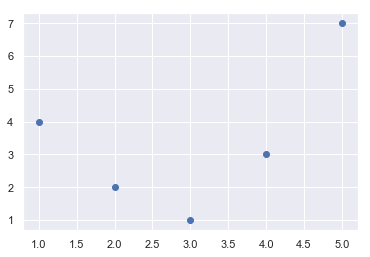

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [49]:
X = x[:, np.newaxis]
print(X)

[[1]
 [2]
 [3]
 [4]
 [5]]


(5, 1)
(5,)


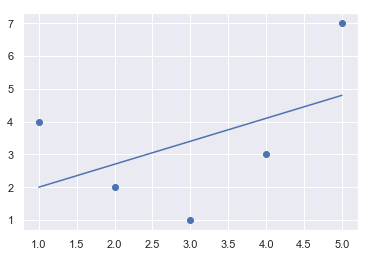

In [51]:
from sklearn.linear_model import LinearRegression
print(X.shape)
print(y.shape)
myLinearModel = LinearRegression().fit(X, y)
predict = myLinearModel.predict(X)
plt.scatter(x, y)
plt.plot(x, predict);

In [9]:
# 做一个X_poly，X_poly越是向右拓展，预测结果越是精确
from sklearn.preprocessing import PolynomialFeatures
myPolyModel = PolynomialFeatures(degree=3, include_bias=False)
X_poly = myPolyModel.fit_transform(X)
print(X_poly)

[[6.5000e+00 2.8000e+00 4.6000e+00 ... 3.1740e+01 1.0350e+01 3.3750e+00]
 [6.7000e+00 2.5000e+00 5.8000e+00 ... 6.0552e+01 1.8792e+01 5.8320e+00]
 [6.8000e+00 3.0000e+00 5.5000e+00 ... 6.3525e+01 2.4255e+01 9.2610e+00]
 ...
 [6.3000e+00 2.5000e+00 4.9000e+00 ... 3.6015e+01 1.1025e+01 3.3750e+00]
 [6.7000e+00 3.1000e+00 5.6000e+00 ... 7.5264e+01 3.2256e+01 1.3824e+01]
 [4.9000e+00 3.6000e+00 1.4000e+00 ... 1.9600e-01 1.4000e-02 1.0000e-03]]


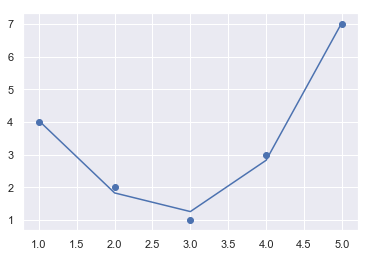

In [151]:
myLinearModel = LinearRegression().fit(X_poly, y)
predict = myLinearModel.predict(X_poly)
plt.scatter(x, y)
plt.plot(x, predict);

In [153]:
from numpy import nan

X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

# 缺失值处理器 - SimpleImputer
from sklearn.impute import SimpleImputer
mySIModel = SimpleImputer(strategy='mean')
X_SI = mySIModel.fit_transform(X)

myLinearModel = LinearRegression().fit(X_SI, y)
myLinearModel.predict(X_SI)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [154]:
from sklearn.pipeline import make_pipeline

myMPModel = make_pipeline(SimpleImputer(strategy='mean'),
                          PolynomialFeatures(degree=2),
                          LinearRegression())
myMPModel.fit(X, y) 
print(y)
print(myMPModel.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
